In [1]:
import pandas as pd
import matplotlib
from pandas import DataFrame
import json
import excel
import tweepy as tw


API_KEY = "xloKoOYLYwftMGE1JcBaJ0csx"
API_SECRET_KEY = "xG4MdEYo5W6SGhTRb0SYGYvGE5gzHbckbuwenIO6kN6xPORZ68"
ACCESS_TOKEN = "1340243550898774016-7am491fPZXjo0M0gzl7OVOhFlmOyw5"
ACCESS_TOKEN_SECRET = "dC74oCfNJQwvcgn5YyfyVLHAQsA1mudbQue17hezhYz3A"

auth = tw.OAuthHandler(API_KEY, API_SECRET_KEY)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tw.API(auth, wait_on_rate_limit=True)


count = 10000

search_query = "#INDvsAUSTest -filter:retweets"


result = tw.Cursor(api.search,
                   q=search_query,
                   since="2000-01-01").items(count)

print("starting")
tweets_copy = []
tweets_df = pd.DataFrame()
for tweet in result:
    hashtags = []

    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name,
                                               'user_location': tweet.user.location,
                                               'user_description': tweet.user.description,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': text,
                                               'retweet_count': tweet.retweet_count,
                                               'followers_count': tweet.user.followers_count,
                                               'len': len(text),
                                               'lang': tweet.lang,
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source}))
    tweets_df = tweets_df.reset_index(drop=True)

# show the dataframe
print("done")

with open('tweets.json', 'w') as json_file:
    json.dump(tweets_df.to_json(orient="table"), json_file)

starting
done


In [2]:
tweets_df

,user_name,user_location,user_description,user_verified,date,text,retweet_count,followers_count,len,lang,hashtags,source
0,Ottko,"Madhya Pradesh, India",Phir Bhi Dil Hai Hindustani\nBusiness Entrepre...,False,2020-12-22 13:12:31,What happened we don't have proper playing XI ...,0,19,273,en,None,Twitter for Android
1,crictweets,,Analysis of current cricket.\nLatest Cricket N...,False,2020-12-22 13:05:38,What should be the opening pair for 🇮🇳? #Borde...,0,0,90,en,"[BorderGavaskarTrophy, boxingdaytest, INDvsAUS...",Twitter for iPhone
2,Oneindia Bengali,India,A Bengali news portal brings news in Bengali f...,False,2020-12-22 12:56:12,সঙ্কটে ভারত! কামব্যাকের আগে অস্ট্রেলিয়ায় কবে...,0,2417,164,bn,"[RohitSharma, INDvAUS]",Twitter Web App
3,Shaleen Rao,Earth..Opinions are Personal..,"Passionate about Music, Movies & Cricket.Stint...",False,2020-12-22 12:55:24,Former Australian Cricketers predicting 4-0 wh...,0,79,283,en,[TeamIndia],Twitter for Android
4,Oneindia Bengali,India,A Bengali news portal brings news in Bengali f...,False,2020-12-22 12:52:02,শামির পরিবর্তে হাড্ডাহাড্ডি লড়াইয়ে সিরাজ ও স...,0,2417,157,bn,None,Twitter Web App
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Malik Hafeez Awan,"Islamabad, Pakistan","ElectronicEngineer, CSS Aspirant, CricketingFa...",False,2020-12-19 06:20:10,Indians are being rapped at #Adelaide with the...,0,102,170,en,[Adelaide],Twitter for Android
9996,Aditya,India,Ancora Imparo,False,2020-12-19 06:20:08,Let's forget this nightmare and blame it on 20...,0,40,63,en,[INDvsAUSTest],Twitter for iPhone
9997,karthick P,chennai,journalist @pttvonlinenews | Tweets &Views are...,False,2020-12-19 06:20:08,மிகக் குறைந்த ரன்னில் சுருண்ட இந்தியா!\n#India...,0,86,115,ta,"[IndiavsAustralia, INDvsAUSTest, TeamIndia, Ko...",TweetDeck
9998,Marcus Aurelias,,Positive and friendly,False,2020-12-19 06:20:04,Well just when you thought that the year could...,0,19,126,en,"[INDvsAUSTest, ViratKohli]",Twitter for Android


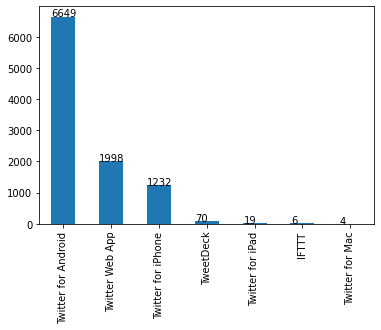

In [131]:
ax = pd.value_counts(tweets_df['source']).head(7).plot.bar()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

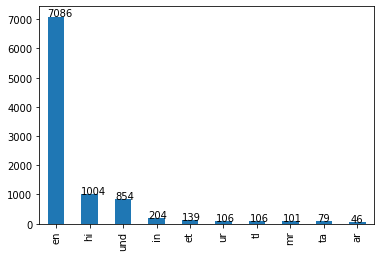

In [132]:
ax = pd.value_counts(tweets_df['lang']).head(10).plot.bar()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

<AxesSubplot:ylabel='user_verified'>

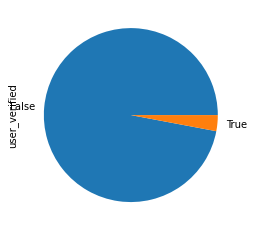

In [134]:
pd.value_counts(tweets_df['user_verified']).plot.pie()


In [135]:
tweets_df['followers_count'] = tweets_df['followers_count'].astype(int) 
tweets_df['len'] = tweets_df['len'].astype(int) 

In [136]:
tweets_df.sort_values(by=['followers_count'], inplace=True, ascending=False)

In [137]:
tweets_df


,user_name,user_location,user_description,user_verified,date,text,retweet_count,followers_count,len,lang,hashtags,source
7507,AajTak,India,"AajTak covers breaking news, latest news in po...",True,2020-12-19 07:31:12,"शर्मनाक हार की कगार पर टीम इंडिया, ऑस्ट्रेलिया...",0,11593807,148,hi,"[Sports, INDvsAUSTest]",Twitter Web App
2161,AajTak,India,"AajTak covers breaking news, latest news in po...",True,2020-12-19 15:26:47,एडिलेड टेस्ट में भारतीय टीम को 8 विकेट से हार ...,5,11592275,123,hi,"[INDvsAUSTest, viratkholi, Video]",Twitter Web App
999,AajTak,India,"AajTak covers breaking news, latest news in po...",True,2020-12-20 05:04:40,गावस्कर-पोंटिंग ने इस खिलाड़ी को जल्द शामिल कर...,4,11591902,138,hi,"[Cricket, INDvsAUSTest]",Twitter Web App
628,AajTak,India,"AajTak covers breaking news, latest news in po...",True,2020-12-20 10:41:49,इस मामले में भी सोनू सूद से मदद मांग रहे हैं!\...,113,11591850,106,hi,"[SonuSood, ViratKohli, INDvsAUSTest]",Twitter Web App
8947,ABP News,India,Follow for latest news alerts from India,True,2020-12-19 06:37:37,#INDvsAUSTest LIVE: ऑस्ट्रेलिया को जीत के लिए ...,1,10697660,92,hi,[INDvsAUSTest],TweetDeck
...,...,...,...,...,...,...,...,...,...,...,...,...
5070,ameenalsharef,,,False,2020-12-19 08:52:23,#INDvsAUSTest\nما لِعيني كُلّما أغمضتُها \nلاح...,0,0,127,ar,[INDvsAUSTest],Twitter Web App
2705,Ekaansh,,,False,2020-12-19 13:36:47,@BCCI please convince @CricketAus to include #...,0,0,280,en,[RohithSharma],Twitter Web App
3317,Bclontia_7,"Rohtak, India",💻Engineer\nPassionate 🏏⚽ Fan\n#ALL_LIVES_MATTE...,False,2020-12-19 11:32:58,Only 2 well recognised teams got all out Befor...,0,0,279,en,None,Twitter for Android
3873,Baskar Nagarajan,Indian,Music buff.Great fan of Raja sir(Ilaiyaraja),False,2020-12-19 10:30:16,That was very poor batting by India in the 2nd...,0,0,112,en,[INDvsAUSTest],Twitter Web App


In [138]:
tweets_df.sort_values(by=['len'], inplace=True, ascending=False)

<AxesSubplot:xlabel='lang'>

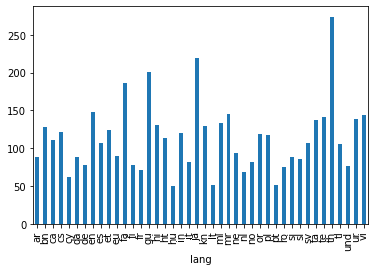

In [139]:
mean = tweets_df.groupby('lang')['len'].mean()
tweets_df.groupby('lang')['len'].mean().plot(kind='bar')



In [140]:
print(mean)

lang
ar      88.043478
bn     127.277778
ca     111.250000
cs     121.500000
cy      62.333333
da      88.428571
de      77.166667
en     148.402907
es     107.320000
et     123.482014
eu      89.500000
fa     186.000000
fi      77.250000
fr      70.750000
gu     200.629630
hi     130.082669
ht     113.657143
hu      50.500000
in     120.029412
it      82.000000
ja     219.333333
kn     128.857143
lt      51.500000
ml     132.888889
mr     144.465347
ne      93.000000
nl      68.444444
no      82.000000
or     118.333333
pl     117.250000
pt      51.250000
ro      75.500000
si      88.000000
sl      85.333333
sv     106.666667
ta     137.582278
te     140.869565
th     274.000000
tl     104.839623
und     75.757611
ur     138.037736
vi     144.000000
Name: len, dtype: float64


In [141]:
tweets_df.sort_values(by=['followers_count'], inplace=True, ascending=False)

In [142]:
tweets_df.user_name.head(30).unique()

array(['AajTak', 'ABP News', 'Wasim Akram', 'Zee News English',
       'Shoaib Akhtar', 'MANOJ TIWARY', 'Sorabh Pant', 'Geo News Urdu',
       'Republic', 'DNA'], dtype=object)

In [143]:
tweets_df.sort_values(by=['retweet_count'], inplace=True, ascending=False)

In [144]:
tweets_df

,user_name,user_location,user_description,user_verified,date,text,retweet_count,followers_count,len,lang,hashtags,source
6923,Shoaib Akhtar,,YouTube: https://t.co/cj87mk4skE Instagram: ht...,True,2020-12-19 07:44:08,I woke up &amp; saw the score 369. I couldn't ...,1960,3484576,207,en,None,Twitter for Android
7581,Srivatsa,Bengaluru,Congressman | Politics | Karnataka | ಕನ್ನಡ | P...,True,2020-12-19 07:29:22,"Hey @KanganaTeam, is Jay Shah a 'Worst Product...",1421,199661,175,en,None,Twitter for Android
7443,Wasim Akram,,"Pakistan's former Cricket Captain, Internation...",True,2020-12-19 07:32:39,Wait what happened? I just went to play 9 hole...,931,5381273,131,en,[INDvsAUSTest],Twitter for iPhone
2306,Azhar Mashwani,Pakistan,Focal Person (Digital Media) to CM Punjab || F...,True,2020-12-19 15:01:17,😂😂😂 #INDvsAUSTest #AUSvIND https://t.co/KbfGcY...,550,58716,50,und,"[INDvsAUSTest, AUSvIND]",Twitter for Android
3846,Comedy Tonic Telugu,"Hyderabad, India",Do Follow us on Facebook- \nhttps://t.co/ZI5Fz...,False,2020-12-19 10:32:55,#INDvsAUSTest https://t.co/j57hY75aNH,508,18830,37,und,[INDvsAUSTest],Twitter Web App
...,...,...,...,...,...,...,...,...,...,...,...,...
8758,BabaBrainwash,Mumbai,"WannabeSinger, Nationalist, Die Hard AndazApna...",False,2020-12-19 06:43:43,#INDvsAUSTest Abey Shastri ko nikaalo yaar,0,185,42,hi,[INDvsAUSTest],Twitter for Android
680,KHEL UPDATES,"Doha, Qatar",Follow us for comprehensive coverage on #2022W...,False,2020-12-20 09:23:03,Call on #Sydney Test wont be rushed by #COVID ...,0,185,158,en,"[Sydney, COVID, INDvsAUSTest, cricket, INDvsAUS]",Twitter Web App
4887,Stephenv,,"Writer into cricket, film and tv",False,2020-12-19 09:03:36,Dear Indian cricket fans - we have been where ...,0,185,187,en,None,Twitter for iPhone
9880,Sagar Maverick,,Machine Learning and Deep Learning enthusiast...,False,2020-12-19 06:21:34,लगता है सबको कोहली के बच्चे के मुंडन पे जाने क...,0,185,96,hi,"[INDvsAUS, INDvsAUSTest, RaviShastri]",Twitter for iPad


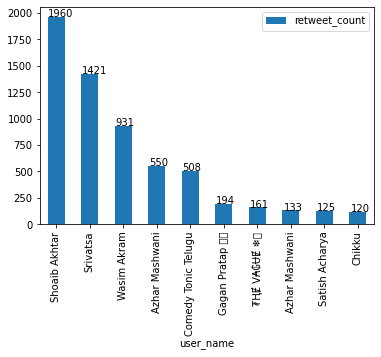

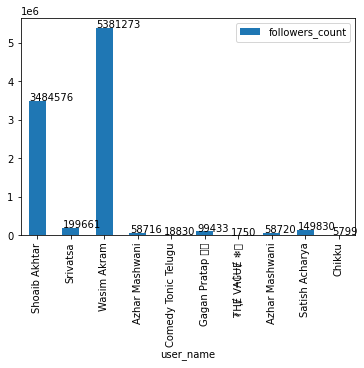

In [130]:
ax = tweets_df.head(10).plot(x='user_name', y='retweet_count', kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
ax = tweets_df.head(10).plot(x='user_name', y='followers_count', kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))